# EDA 

## import package 

In [338]:
import pandas as pd 
import pathlib
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## import data

In [339]:
data_train= pd.read_csv("C:/Users/Client/Desktop/cancer_project/train.csv")
data_test= pd.read_csv("C:/Users/Client/Desktop/cancer_project/test.csv")
df_test=pd.DataFrame(data_test)
df_train=pd.DataFrame(data_train)
df_train.head()
df_test.head()

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy
0,8,31.0,Married,1961.0,4.0,2.8,Yes,No,NaN
1,9,38.0,Married,NaN,9.0,NaN,Yes,No,NaN
2,12,69.0,Married,1966.0,NaN,2.5,No,Yes,No
3,14,NaN,NaN,1966.0,9.0,3.0,NaN,No,No
4,21,46.0,NaN,1965.0,0.0,4.7,Yes,No,No


In [340]:
df_train.head()

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
0,3,47.0,Married,NaN,5.0,2.0,No,No,No,0
1,4,54.0,Married,1965.0,0.0,1.4,No,No,No,0
2,11,39.0,Married,1958.0,0.0,4.6,Yes,Yes,No,0
3,13,45.0,Married,1959.0,15.0,2.9,Yes,No,No,0
4,17,60.0,NaN,1963.0,13.0,4.3,Yes,No,No,0


In [341]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               1200 non-null   int64  
 1   Age                      1063 non-null   float64
 2   Marital_Status           1082 non-null   object 
 3   Year of Operation        1070 non-null   float64
 4   Positive_Axillary_Nodes  1070 non-null   float64
 5   Tumor_Size               1077 non-null   float64
 6   Radiation_Therapy        1088 non-null   object 
 7   Chemotherapy             1055 non-null   object 
 8   Hormone_Therapy          1070 non-null   object 
 9   Survival_Status          1200 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 93.9+ KB


In [342]:
data_train.describe()

,Patient_ID,Age,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Survival_Status
count,1200.000000,1063.000000,1070.000000,1070.000000,1077.000000,1200.000000
mean,755.875000,56.937912,1963.394393,9.575701,2.771309,0.493333
std,436.736713,15.534177,3.330215,9.931542,1.335010,0.500164
min,1.000000,30.000000,1958.000000,0.000000,0.500000,0.000000
25%,373.750000,43.000000,1961.000000,3.000000,1.600000,0.000000
50%,769.500000,58.000000,1963.000000,7.000000,2.800000,0.000000
75%,1137.500000,70.000000,1966.000000,13.000000,3.900000,1.000000
max,1499.000000,83.000000,1969.000000,52.000000,5.000000,1.000000


In [343]:
data_test.describe()

,Patient_ID,Age,Year of Operation,Positive_Axillary_Nodes,Tumor_Size
count,300.000000,270.000000,269.000000,276.000000,275.000000
mean,729.000000,56.555556,1963.665428,10.782609,2.792727
std,418.551899,15.286200,3.519608,11.774079,1.291982
min,8.000000,30.000000,1958.000000,0.000000,0.500000
25%,392.750000,43.000000,1961.000000,3.000000,1.800000
50%,697.000000,58.000000,1964.000000,7.000000,2.800000
75%,1071.250000,69.000000,1967.000000,14.000000,3.900000
max,1500.000000,83.000000,1969.000000,52.000000,5.000000


### merge data

In [344]:
data_train = pd.read_csv("C:/Users/Client/Desktop/cancer_project/train.csv")
data_test = pd.read_csv("C:/Users/Client/Desktop/cancer_project/test.csv")

data_new = pd.concat([data_train, data_test], axis=0)  # axis=0 empile les lignes

data_new.reset_index(drop=True, inplace=True)

print(data_new.shape)  


(1500, 10)


In [345]:
data_new.describe()

,Patient_ID,Age,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Survival_Status
count,1500.000000,1333.000000,1339.000000,1346.000000,1352.000000,1200.000000
mean,750.500000,56.860465,1963.448842,9.823180,2.775666,0.493333
std,433.157015,15.479330,3.369525,10.342963,1.325927,0.500164
min,1.000000,30.000000,1958.000000,0.000000,0.500000,0.000000
25%,375.750000,43.000000,1961.000000,3.000000,1.700000,0.000000
50%,750.500000,58.000000,1963.000000,7.000000,2.800000,0.000000
75%,1125.250000,70.000000,1966.000000,13.750000,3.900000,1.000000
max,1500.000000,83.000000,1969.000000,52.000000,5.000000,1.000000


In [346]:
data_new.isna().sum()

Patient_ID                   0
Age                        167
Marital_Status             155
Year of Operation          161
Positive_Axillary_Nodes    154
Tumor_Size                 148
Radiation_Therapy          144
Chemotherapy               179
Hormone_Therapy            162
Survival_Status            300
dtype: int64

In [347]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               1500 non-null   int64  
 1   Age                      1333 non-null   float64
 2   Marital_Status           1345 non-null   object 
 3   Year of Operation        1339 non-null   float64
 4   Positive_Axillary_Nodes  1346 non-null   float64
 5   Tumor_Size               1352 non-null   float64
 6   Radiation_Therapy        1356 non-null   object 
 7   Chemotherapy             1321 non-null   object 
 8   Hormone_Therapy          1338 non-null   object 
 9   Survival_Status          1200 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 117.3+ KB


In [348]:
df=data_new

### data_structure 

In [349]:
def data_diagnostic(df):
        print("#"*50)
        print(df.info())
        print("#"*50)
        print("The number of total rows  {x: .0f} ".format(x=df.shape[0]))
        print("The number of total variables {x: .0f} ".format(x=df.shape[1]))
        print("The variables names {x:} ".format(x=list(df.columns.values)))

        column_headers =list(df.columns.values)
        qualitative_columns = [col for col in column_headers if df[col].dtype=="object"]
        quantitative_columns = [col for col in column_headers if df[col].dtype in ['int64', 'float64']]

        print("The qualitative variables {x:} ".format(x=qualitative_columns))
        print("The quantitative variables {x:} ".format(x=quantitative_columns))
        print("#"*50)
        print("Total number missing value {x:} ".format(x=df.isnull().sum()))

In [350]:
data_diagnostic(df)

##################################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               1500 non-null   int64  
 1   Age                      1333 non-null   float64
 2   Marital_Status           1345 non-null   object 
 3   Year of Operation        1339 non-null   float64
 4   Positive_Axillary_Nodes  1346 non-null   float64
 5   Tumor_Size               1352 non-null   float64
 6   Radiation_Therapy        1356 non-null   object 
 7   Chemotherapy             1321 non-null   object 
 8   Hormone_Therapy          1338 non-null   object 
 9   Survival_Status          1200 non-null   float64
dtypes: float64(5), int64(1), object(4)
memory usage: 117.3+ KB
None
##################################################
The number of total rows   1500 
The number of total variables  10 
The va

In [351]:
def na(df, percent = True):
    srs = df.isna().sum()[df.isna().sum() > 0]
    srs = srs.sort_values(ascending=False)
    if percent:
        print('% of NaNs in df:')
        return srs / df.shape[0]
    else:
        print('# of NaNs in df:')
        return srs

na(df, False)

# of NaNs in df:


Survival_Status            300
Chemotherapy               179
Age                        167
Hormone_Therapy            162
Year of Operation          161
Marital_Status             155
Positive_Axillary_Nodes    154
Tumor_Size                 148
Radiation_Therapy          144
dtype: int64

Survival_Status            20.000000
Chemotherapy               11.933333
Age                        11.133333
Hormone_Therapy            10.800000
Year of Operation          10.733333
Marital_Status             10.333333
Positive_Axillary_Nodes    10.266667
Tumor_Size                  9.866667
Radiation_Therapy           9.600000
dtype: float64


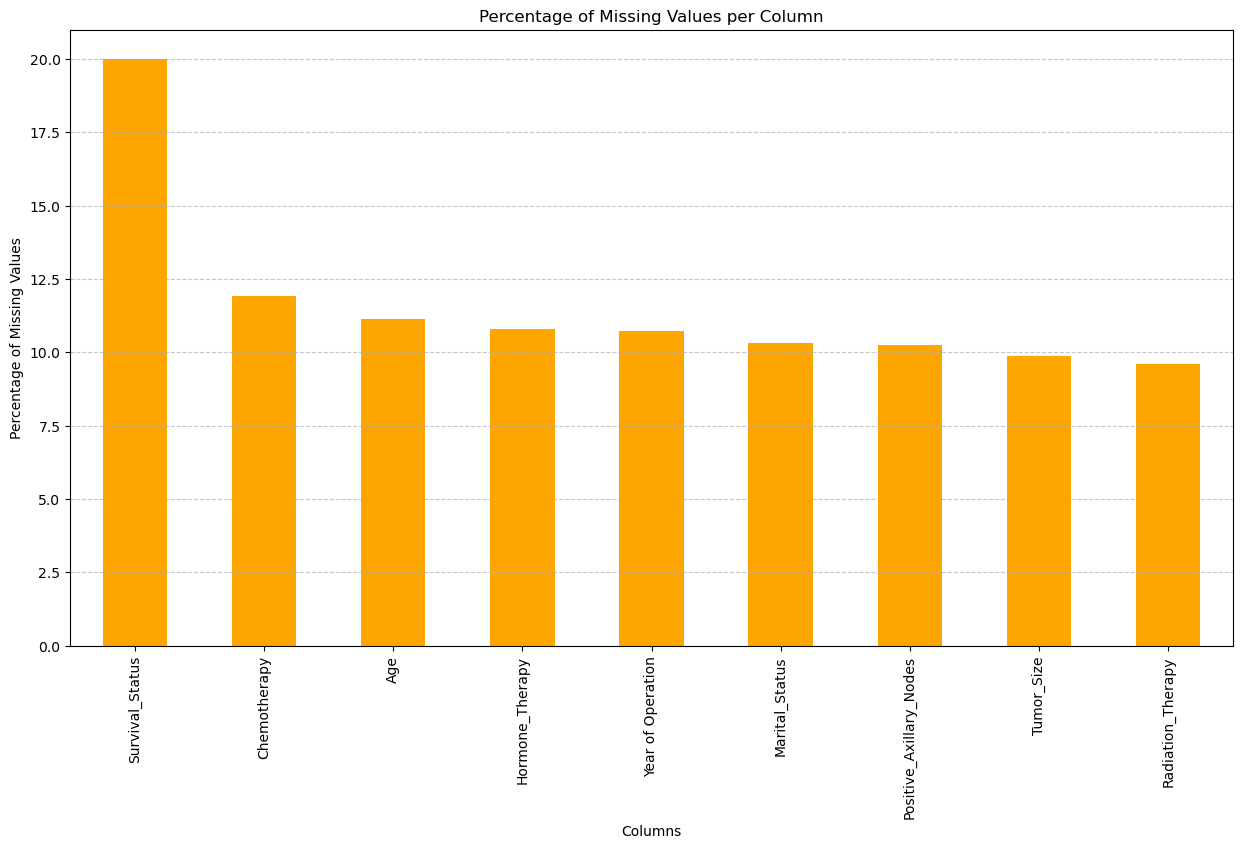

In [352]:
#Calculate the percentage of NaNs per column
na_percentage = (df.isna().sum() / len(df)) * 100

# Filter out columns with no missing values
na_percentage = na_percentage[na_percentage > 0]

# Sort by the percentage of missing values
na_percentage = na_percentage.sort_values(ascending=False)
print(na_percentage)
# Plot the percentage of missing values
plt.figure(figsize=(15, 8))
na_percentage.plot(kind='bar', color='orange')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## Analyse univarie

### numerical variable 

In [ ]:
dtypes = df.dtypes.to_frame().reset_index()
dtypes.columns = ['col', 'dtype']
print('Df dtypes:')
dtypes.groupby('dtype').size()

Df dtypes:


dtype
int64      1
float64    5
object     4
dtype: int64

In [354]:
def numeric_analysis(df):
        return print(df.describe().T)
numeric_analysis(df)

                          count         mean         std     min      25%  \
Patient_ID               1500.0   750.500000  433.157015     1.0   375.75   
Age                      1333.0    56.860465   15.479330    30.0    43.00   
Year of Operation        1339.0  1963.448842    3.369525  1958.0  1961.00   
Positive_Axillary_Nodes  1346.0     9.823180   10.342963     0.0     3.00   
Tumor_Size               1352.0     2.775666    1.325927     0.5     1.70   
Survival_Status          1200.0     0.493333    0.500164     0.0     0.00   

                            50%      75%     max  
Patient_ID                750.5  1125.25  1500.0  
Age                        58.0    70.00    83.0  
Year of Operation        1963.0  1966.00  1969.0  
Positive_Axillary_Nodes     7.0    13.75    52.0  
Tumor_Size                  2.8     3.90     5.0  
Survival_Status             0.0     1.00     1.0  


#### Numerical varaiables visualization

In [355]:
def univariate_analysis(df, base_folder="univariate_analysis"):
        # Ensure the base folder exists
        if not os.path.exists(base_folder):
            os.makedirs(base_folder)
        
        # Select numeric columns
        numeric_cols = df.select_dtypes(include=['number']).columns
        
        for col in numeric_cols:
            # Create a folder for the analysis
            col_folder = os.path.join(base_folder, col)
            if not os.path.exists(col_folder):
                os.makedirs(col_folder)
            
            print(f"\nPerforming Univariate Analysis for: {col}")
            
            # Create a single figure with 2x2 layout
            fig, axes = plt.subplots(2, 2, figsize=(12, 10))
            fig.suptitle(f'Univariate Analysis for {col}', fontsize=16)
            
            # Bar Chart
            sns.barplot(
                x=df[col].value_counts().index, 
                y=df[col].value_counts().values, 
                palette="viridis", 
                ax=axes[0, 0]
            )
            axes[0, 0].set_title('Bar Chart')
            axes[0, 0].set_xlabel(col)
            axes[0, 0].set_ylabel('Frequency')
            
            # Box Plot
            sns.boxplot(y=df[col], palette="viridis", ax=axes[0, 1])
            axes[0, 1].set_title('Box Plot')
            axes[0, 1].set_xlabel(col)
            
            # Density Plot
            sns.kdeplot(df[col], fill=True, color="blue", alpha=0.6, ax=axes[1, 0])
            axes[1, 0].set_title('Density Plot')
            axes[1, 0].set_xlabel(col)
            axes[1, 0].set_ylabel('Density')
            
            # Histogram
            sns.histplot(df[col], kde=False, color="green", ax=axes[1, 1])
            axes[1, 1].set_title('Histogram')
            axes[1, 1].set_xlabel(col)
            axes[1, 1].set_ylabel('Frequency')
            
            # Adjust layout
            plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
            
            # Save the combined plot
            combined_plot_path = os.path.join(col_folder, f"{col}_univariate_analysis.png")
            plt.savefig(combined_plot_path, bbox_inches='tight')
            plt.close()
            
            print(f"Combined plots for {col} saved in: {combined_plot_path}")

In [356]:
univariate_analysis(df, base_folder="univariate_analysis")


Performing Univariate Analysis for: Patient_ID


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for Patient_ID saved in: univariate_analysis\Patient_ID\Patient_ID_univariate_analysis.png

Performing Univariate Analysis for: Age


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for Age saved in: univariate_analysis\Age\Age_univariate_analysis.png

Performing Univariate Analysis for: Year of Operation


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for Year of Operation saved in: univariate_analysis\Year of Operation\Year of Operation_univariate_analysis.png

Performing Univariate Analysis for: Positive_Axillary_Nodes


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for Positive_Axillary_Nodes saved in: univariate_analysis\Positive_Axillary_Nodes\Positive_Axillary_Nodes_univariate_analysis.png

Performing Univariate Analysis for: Tumor_Size


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for Tumor_Size saved in: univariate_analysis\Tumor_Size\Tumor_Size_univariate_analysis.png

Performing Univariate Analysis for: Survival_Status


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Combined plots for Survival_Status saved in: univariate_analysis\Survival_Status\Survival_Status_univariate_analysis.png


### Categorical varaiables

In [357]:
def categorical_analysis(df):
    return print(df.select_dtypes(include='object').describe().T)
categorical_analysis(df)

                  count unique      top  freq
Marital_Status     1345      2  Married   946
Radiation_Therapy  1356      2      Yes  1084
Chemotherapy       1321      2       No   891
Hormone_Therapy    1338      2       No  1219


####  Categorical varaiables visualization

In [358]:
def univariate_analysis_categorical(df, base_folder="univariate_analysis_categorical"):
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    for col in categorical_cols:
        # Create a folder for the analysis
        col_folder = os.path.join(base_folder, col)
        if not os.path.exists(col_folder):
            os.makedirs(col_folder)
        
        print(f"\nPerforming Univariate Analysis for: {col}")
        
        # Create a figure with 1x2 layout
        fig, axes = plt.subplots(1, 2, figsize=(15, 6))
        fig.suptitle(f'Univariate Analysis for {col}', fontsize=16)
        
        # Bar Plot
        sns.countplot(x=df[col], palette="viridis", ax=axes[0])
        axes[0].set_title('Count Plot')
        axes[0].set_xlabel(col)
        axes[0].set_ylabel('Frequency')
        axes[0].tick_params(axis='x', rotation=45)
        
        # Pie Chart
        df[col].value_counts().plot.pie(
            autopct='%1.1f%%', 
            colors=sns.color_palette("viridis", len(df[col].unique())),
            ax=axes[1], 
            startangle=90
        )
        axes[1].set_title('Pie Chart')
        axes[1].set_ylabel('')  # Remove y-label for better visualization
        
        # Adjust layout
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Make room for the main title
        
        # Save the combined plot
        combined_plot_path = os.path.join(col_folder, f"{col}_univariate_analysis.png")
        plt.savefig(combined_plot_path, bbox_inches='tight')
        plt.close()
        
        print(f"Combined plots for {col} saved in: {combined_plot_path}")
univariate_analysis_categorical(df, base_folder="univariate_analysis_categorical")


Performing Univariate Analysis for: Marital_Status
Combined plots for Marital_Status saved in: univariate_analysis_categorical\Marital_Status\Marital_Status_univariate_analysis.png

Performing Univariate Analysis for: Radiation_Therapy
Combined plots for Radiation_Therapy saved in: univariate_analysis_categorical\Radiation_Therapy\Radiation_Therapy_univariate_analysis.png

Performing Univariate Analysis for: Chemotherapy
Combined plots for Chemotherapy saved in: univariate_analysis_categorical\Chemotherapy\Chemotherapy_univariate_analysis.png

Performing Univariate Analysis for: Hormone_Therapy
Combined plots for Hormone_Therapy saved in: univariate_analysis_categorical\Hormone_Therapy\Hormone_Therapy_univariate_analysis.png


## Multyvarie Analysis

### multivariate analysis with respect to the target variable

In [359]:
df.columns

Index(['Patient_ID', 'Age', 'Marital_Status', 'Year of Operation',
       'Positive_Axillary_Nodes', 'Tumor_Size', 'Radiation_Therapy',
       'Chemotherapy', 'Hormone_Therapy', 'Survival_Status'],
      dtype='object')

In [360]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from concurrent.futures import ThreadPoolExecutor
target = "Survival_Status"
def multivariate_analysis(target, df, base_folder="multivariate_analysis", sample_frac=0.2):
    """
    Performs multivariate analysis with respect to the target variable.
    Outputs:
        - Categorical vs Target: Histograms with Density Curves separately by modality.
        - Numeric vs Target: Scatter plots with Density Curves separately by modality.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        target (str): The target variable for comparison.
        base_folder (str): Directory to save the analysis images.
        sample_frac (float): Fraction of data to sample for faster plotting.
    """
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # --- Categorical vs Target ---
    cat_vs_target_folder = os.path.join(base_folder, "categorical_vs_target")
    if not os.path.exists(cat_vs_target_folder):
        os.makedirs(cat_vs_target_folder)
    
    # Select categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    
    def plot_categorical_vs_target(col):
        print(f"\nAnalyzing Categorical vs Target: {target} vs {col}")
        
        # Create a grid of histograms by modality of the categorical variable
        modalities = df[col].unique()
        n_modalities = len(modalities)
        fig, axes = plt.subplots(1, n_modalities, figsize=(6 * n_modalities, 6), sharey=True)
        
        if n_modalities == 1:
            axes = [axes]  # To handle single modality case
        
        for i, modality in enumerate(modalities):
            subset = df[df[col] == modality]
            sns.histplot(
                subset[target], kde=True, ax=axes[i], alpha=0.6, color='skyblue'
            )
            axes[i].set_title(f'{col} = {modality}')
            axes[i].set_xlabel(target)
            axes[i].set_ylabel('Frequency')
        
        plt.suptitle(f'{target} Distribution by {col} (Separate by Modality)', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for main title
        
        # Save plot
        plot_path = os.path.join(cat_vs_target_folder, f"{target}_vs_{col}.png")
        plt.savefig(plot_path, bbox_inches='tight')
        plt.close()
        print(f"Categorical vs Target (Histograms) saved in: {plot_path}")
    
    # Parallelize the plotting for categorical vs target
    with ThreadPoolExecutor() as executor:
        executor.map(plot_categorical_vs_target, categorical_cols)
    
    # --- Numeric vs Target ---
    num_vs_target_folder = os.path.join(base_folder, "numeric_vs_target")
    if not os.path.exists(num_vs_target_folder):
        os.makedirs(num_vs_target_folder)
    
    # Select numeric columns
    numeric_cols = df.select_dtypes(include=['float64','int64']).columns
    
    def plot_numeric_vs_target(col):
        print(f"\nAnalyzing Numeric vs Target: {target} vs {col}")
        
        # Sample the data for faster plotting
        sampled_df = df.sample(frac=sample_frac, random_state=42)
        
        # Create a grid of scatter plots by modality of the target variable
        modalities = sampled_df[target].unique()
        n_modalities = len(modalities)
        fig, axes = plt.subplots(1, n_modalities, figsize=(6 * n_modalities, 6), sharey=True)
        
        if n_modalities == 1:
            axes = [axes]  # To handle single modality case
        
        for i, modality in enumerate(modalities):
            subset = sampled_df[sampled_df[target] == modality]
            sns.scatterplot(
                x=target, y=col, data=subset, ax=axes[i], alpha=0.4, color='purple'
            )
            sns.kdeplot(
                data=subset, x=target, y=col, ax=axes[i], color="red", levels=3, linewidths=1
            )
            axes[i].set_title(f'{target} = {modality}')
            axes[i].set_xlabel(target)
            axes[i].set_ylabel(col)
        
        plt.suptitle(f'{target} vs {col} (Scatter + Density by Modality)', fontsize=16)
        plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout for main title
        
        # Save plot
        plot_path = os.path.join(num_vs_target_folder, f"{target}_vs_{col}.png")
        plt.savefig(plot_path, bbox_inches='tight')
        plt.close()
        
        print(f"Numeric vs Target (Scatter + Density) saved in: {plot_path}")
    
    # Parallelize the plotting for numeric vs target
    with ThreadPoolExecutor() as executor:
        executor.map(plot_numeric_vs_target, numeric_cols)
multivariate_analysis(target,df,base_folder="multivariate_analysis")


Analyzing Categorical vs Target: Survival_Status vs Marital_Status

Analyzing Categorical vs Target: Survival_Status vs Radiation_Therapy

Analyzing Categorical vs Target: Survival_Status vs Chemotherapy

Analyzing Categorical vs Target: Survival_Status vs Hormone_Therapy


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Categorical vs Target (Histograms) saved in: multivariate_analysis\categorical_vs_target\Survival_Status_vs_Hormone_Therapy.png
Categorical vs Target (Histograms) saved in: multivariate_analysis\categorical_vs_target\Survival_Status_vs_Radiation_Therapy.png
Categorical vs Target (Histograms) saved in: multivariate_analysis\categorical_vs_target\Survival_Status_vs_Chemotherapy.png
Categorical vs Target (Histograms) saved in: multivariate_analysis\categorical_vs_target\Survival_Status_vs_Marital_Status.png

Analyzing Numeric vs Target: Survival_Status vs Patient_ID

Analyzing Numeric vs Target: Survival_Status vs Age

Analyzing Numeric vs Target: Survival_Status vs Year of Operation

Analyzing Numeric vs Target: Survival_Status vs Positive_Axillary_Nodes

Analyzing Numeric vs Target: Survival_Status vs Tumor_Size

Analyzing Numeric vs Target: Survival_Status vs Survival_Status


c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Client\anaconda3\Nouveau dossier\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be rem

Numeric vs Target (Scatter + Density) saved in: multivariate_analysis\numeric_vs_target\Survival_Status_vs_Patient_ID.png
Numeric vs Target (Scatter + Density) saved in: multivariate_analysis\numeric_vs_target\Survival_Status_vs_Age.png
Numeric vs Target (Scatter + Density) saved in: multivariate_analysis\numeric_vs_target\Survival_Status_vs_Tumor_Size.png
Numeric vs Target (Scatter + Density) saved in: multivariate_analysis\numeric_vs_target\Survival_Status_vs_Survival_Status.png
Numeric vs Target (Scatter + Density) saved in: multivariate_analysis\numeric_vs_target\Survival_Status_vs_Year of Operation.png
Numeric vs Target (Scatter + Density) saved in: multivariate_analysis\numeric_vs_target\Survival_Status_vs_Positive_Axillary_Nodes.png


### Multyvarie Analysis advanced

In [361]:
def scatter_plot_combinations(target, df, base_folder="scatter_combinations"):
    """
    Generates scatter plots for all possible combinations between the target variable,
    one categorical variable, and one numerical variable.
    Outputs:
        - Scatter plots showing the relationship between target and numerical variable,
          colored by the categories of the categorical variable.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
        target (str): The target variable for comparison.
        base_folder (str): Directory to save the scatter plots.
    """
    # Ensure the base folder exists
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    # Select categorical and numeric columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    
    # Iterate through all combinations of categorical and numerical variables
    for cat_col in categorical_cols:
        if cat_col != target:  # Skip the target itself
            for num_col in numeric_cols:
                if num_col != target:  # Skip the target itself
                    print(f"\nCreating Scatter Plot: Target={target}, Categorical={cat_col}, Numerical={num_col}")
                    
                    # Plot
                    plt.figure(figsize=(10, 6))
                    sns.scatterplot(
                        x=num_col, 
                        y=target, 
                        hue=cat_col, 
                        data=df, 
                        palette="viridis", 
                        alpha=0.6
                    )
                    plt.title(f'{target} vs {num_col} by {cat_col}')
                    plt.xlabel(num_col)
                    plt.ylabel(target)
                    plt.legend(title=cat_col)
                    
                    # Save plot
                    plot_folder = os.path.join(base_folder, f"{target}_vs_{num_col}_by_{cat_col}")
                    if not os.path.exists(plot_folder):
                        os.makedirs(plot_folder)
                    plot_path = os.path.join(plot_folder, f"{target}_vs_{num_col}_by_{cat_col}.png")
                    plt.savefig(plot_path, bbox_inches='tight')
                    plt.close()
                    
                    print(f"Scatter Plot saved in: {plot_path}")
scatter_plot_combinations(target, df, base_folder="scatter_combinations")                    


Creating Scatter Plot: Target=Survival_Status, Categorical=Marital_Status, Numerical=Patient_ID
Scatter Plot saved in: scatter_combinations\Survival_Status_vs_Patient_ID_by_Marital_Status\Survival_Status_vs_Patient_ID_by_Marital_Status.png

Creating Scatter Plot: Target=Survival_Status, Categorical=Marital_Status, Numerical=Age
Scatter Plot saved in: scatter_combinations\Survival_Status_vs_Age_by_Marital_Status\Survival_Status_vs_Age_by_Marital_Status.png

Creating Scatter Plot: Target=Survival_Status, Categorical=Marital_Status, Numerical=Year of Operation
Scatter Plot saved in: scatter_combinations\Survival_Status_vs_Year of Operation_by_Marital_Status\Survival_Status_vs_Year of Operation_by_Marital_Status.png

Creating Scatter Plot: Target=Survival_Status, Categorical=Marital_Status, Numerical=Positive_Axillary_Nodes
Scatter Plot saved in: scatter_combinations\Survival_Status_vs_Positive_Axillary_Nodes_by_Marital_Status\Survival_Status_vs_Positive_Axillary_Nodes_by_Marital_Status.p

### Correlation matrix

In [362]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Supprimer les lignes contenant des NaN ou des inf
column_headers = df.columns.to_list()
quantitative_columns = [col for col in column_headers if df[col].dtype in ['int64', 'float64']]

# Nettoyage des valeurs infinies et manquantes
cleaned_df = df[quantitative_columns].replace([np.inf, -np.inf], np.nan).dropna()

# Vérifier si les valeurs infinies ou NaN ont disparu
print(cleaned_df.isna().sum())  # Devrait afficher 0 partout

def correlation_and_significance(numeric_df, base_folder="correlation_analysis"):
    """
    Generates a correlation matrix heatmap with significance markers.
    
    Parameters:
        numeric_df (pd.DataFrame): The cleaned DataFrame with numerical variables.
        base_folder (str): Directory to save the analysis images.
    """
    # Assurer l'existence du dossier de sauvegarde
    if not os.path.exists(base_folder):
        os.makedirs(base_folder)
    
    cols = numeric_df.columns
    
    # Calculer la matrice de corrélation
    corr_matrix = numeric_df.corr()
    
    # Initialiser la matrice des p-values
    p_values = pd.DataFrame(np.ones((len(cols), len(cols))), columns=cols, index=cols)
    
    # Calculer les p-values pour chaque paire de variables
    for row in cols:
        for col in cols:
            if row != col:
                _, p_value = pearsonr(numeric_df[row], numeric_df[col])
                p_values.loc[row, col] = p_value
    
    # --- Affichage de la matrice de corrélation avec significativité ---
    plt.figure(figsize=(14, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

    # Ajouter des marqueurs de significativité
    for i in range(len(cols)):
        for j in range(len(cols)):
            if i != j:  # Ne pas marquer la diagonale
                p_val = p_values.iloc[i, j]
                x = j + 0.5
                y = i + 0.5
                
                # Vert si significatif (p < 0.05), rouge sinon
                color = 'green' if p_val < 0.05 else 'red'
                plt.plot(x, y, 'o', color=color)
    
    plt.title('Correlation Matrix with Significance (Numerical Variables)', fontsize=18)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()
    
    # Sauvegarde de l'image
    corr_plot_path = os.path.join(base_folder, "correlation_matrix_significance.png")
    plt.savefig(corr_plot_path, bbox_inches='tight')
    plt.close()
    
    print(f"Correlation matrix with significance saved in: {corr_plot_path}")

# Exécuter la fonction avec les données nettoyées
correlation_and_significance(cleaned_df, base_folder="correlation_analysis")


Patient_ID                 0
Age                        0
Year of Operation          0
Positive_Axillary_Nodes    0
Tumor_Size                 0
Survival_Status            0
dtype: int64
Correlation matrix with significance saved in: correlation_analysis\correlation_matrix_significance.png


## cleaning data 

### missing values

In [363]:
class MissingDataHandler:
    def __init__(self, df):
        self.df = df  # Appliquer les changements directement sur le DataFrame original
    # 1. Supprimer les colonnes avec trop de valeurs manquantes
    def drop_column(self, threshold=0.5):
        """Drop columns with more than threshold% missing values."""
        self.df.dropna(thresh=len(self.df) * (1 - threshold), axis=1, inplace=True)
    # 2. Supprimer les lignes avec des valeurs manquantes
    def drop_row(self):
        """Drop rows with any missing values."""
        self.df.dropna(inplace=True)
    # 3. Imputation avec la moyenne ou la médiane
    def impute_mean_median(self, strategy='mean'):
        """Impute missing values in all numerical columns with mean or median."""
        num_cols = self.df.select_dtypes(include=[np.number]).columns
        for col in num_cols:
            imputer = SimpleImputer(strategy=strategy)
            self.df[col] = imputer.fit_transform(self.df[[col]])
    
    def group_imputation(self, group_by, strategy='mean'):
        """Group-wise imputation using mean or median for all numerical columns."""
        num_cols = self.df.select_dtypes(include=[np.number]).columns
        for col in num_cols:
            self.df[col].fillna(self.df.groupby(group_by)[col].transform(strategy), inplace=True)
    # 4. Remplir par la valeur la plus fréquente (catégories)
    def impute_categorical(self, strategy='most_frequent', fill_value=None):
        """Impute missing values in all categorical columns."""
        cat_cols = self.df.select_dtypes(exclude=[np.number]).columns
        for col in cat_cols:
            if strategy == 'constant' and fill_value is not None:
                self.df[col].fillna(fill_value, inplace=True)
            else:
                imputer = SimpleImputer(strategy=strategy)
                self.df[col] = imputer.fit_transform(self.df[[col]]).ravel()
    # 5. Remplissage en avant et en arrière
    def forward_fill(self):
        """Forward fill missing values for all columns."""
        self.df.fillna(method='ffill', inplace=True)
    
    def backward_fill(self):
        """Backward fill missing values for all columns."""
        self.df.fillna(method='bfill', inplace=True)
    # 6. Interpolation (utile pour les séries temporelles)
    def interpolate(self, method='linear'):
        """Interpolate missing values for all numerical columns."""
        num_cols = self.df.select_dtypes(include=[np.number]).columns
        for col in num_cols:
            self.df[col].interpolate(method=method, inplace=True)
    # using KNN for all numerical columns
    def knn_imputation(self, n_neighbors=5):
        """Impute missing values using KNN for all numerical columns."""
        imputer = KNNImputer(n_neighbors=n_neighbors)
        self.df[:] = imputer.fit_transform(self.df)
    # using Iterative Imputer (MICE)
    def iterative_imputation(self):
        """Impute missing values using Iterative Imputer (MICE) for all numerical columns."""
        imputer = IterativeImputer()
        self.df[:] = imputer.fit_transform(self.df)
    
    def get_dataframe(self):
        """Return the processed DataFrame."""
        return self.df


In [364]:
# Importer la classe
handler = MissingDataHandler(df)
# Supprimer les colonnes avec plus de 50% de valeurs manquantes
handler.drop_column(threshold=0.9)
# Imputation des valeurs manquantes
handler.impute_mean_median(strategy='median')  # Impute par la moyenne pour les colonnes numériques
handler.impute_categorical(strategy='most_frequent')  # Impute par la valeur la plus fréquente pour les catégoriques
# Utiliser forward fill ou backward fill si nécessaire
handler.forward_fill()
# Récupérer le DataFrame traité
cleaned_df = handler.get_dataframe()
print("\nDataFrame après traitement :")
cleaned_df.info()
df=cleaned_df
df.describe()


DataFrame après traitement :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               1500 non-null   float64
 1   Age                      1500 non-null   float64
 2   Marital_Status           1500 non-null   object 
 3   Year of Operation        1500 non-null   float64
 4   Positive_Axillary_Nodes  1500 non-null   float64
 5   Tumor_Size               1500 non-null   float64
 6   Radiation_Therapy        1500 non-null   object 
 7   Chemotherapy             1500 non-null   object 
 8   Hormone_Therapy          1500 non-null   object 
 9   Survival_Status          1500 non-null   float64
dtypes: float64(6), object(4)
memory usage: 117.3+ KB


C:\Users\Client\AppData\Local\Temp\ipykernel_664\2934517159.py:38: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  self.df.fillna(method='ffill', inplace=True)


,Patient_ID,Age,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Survival_Status
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,750.500000,56.987333,1963.400667,9.533333,2.778067,0.394667
std,433.157015,14.596022,3.186466,9.834702,1.258791,0.488942
min,1.000000,30.000000,1958.000000,0.000000,0.500000,0.000000
25%,375.750000,45.000000,1961.000000,3.000000,1.800000,0.000000
50%,750.500000,58.000000,1963.000000,7.000000,2.800000,0.000000
75%,1125.250000,68.000000,1966.000000,12.000000,3.800000,1.000000
max,1500.000000,83.000000,1969.000000,52.000000,5.000000,1.000000


In [365]:
def na(df, percent = True):
    srs = df.isna().sum()[df.isna().sum() > 0]
    srs = srs.sort_values(ascending=False)
    if percent:
        print('% of NaNs in df:')
        return srs / df.shape[0]
    else:
        print('# of NaNs in df:')
        return srs

na(df, False)

# of NaNs in df:


Series([], dtype: int64)

### Removing duplicates rows

In [366]:
def remove_duplicates(df, subset=None, keep='first', inplace=False):
    """
    Removes duplicate rows from the DataFrame and provides a summary of duplicates.
    Parameters:
        df (pd.DataFrame): The DataFrame from which to remove duplicates.
        subset (list): List of columns to consider for duplicate checking. 
                    If None, checks all columns.
        keep (str): Which duplicates to keep. Options:
            - 'first': Keep the first occurrence (default).
            - 'last': Keep the last occurrence.
            - 'none': Drop all duplicates.
        inplace (bool): If True, modifies the original DataFrame. 
                        If False, returns a new DataFrame.
    Returns:
        pd.DataFrame: DataFrame with duplicates removed (if inplace=False).
    """
    if keep not in ['first', 'last', 'none']:
        raise ValueError("keep must be one of 'first', 'last', or 'none'.")
    # Count duplicates before removal
    total_rows = len(df)
    duplicate_rows = df.duplicated(subset=subset, keep=False).sum()
    percentage_duplicates = (duplicate_rows / total_rows) * 100
    print(f"Total Rows: {total_rows}")
    print(f"Duplicate Rows: {duplicate_rows} ({percentage_duplicates:.2f}%)")
    if duplicate_rows == 0:
        print("No duplicates found. No rows removed.")
        return df if not inplace else None
    # Handle duplicate removal    if keep == 'none':
        # Drop all duplicates and keep only unique rows
        duplicated_mask = df.duplicated(subset=subset, keep=False)
        result = df[~duplicated_mask]
    else:
        # Use pandas built-in drop_duplicates
        result = df.drop_duplicates(subset=subset, keep=keep)
    # Count duplicates after removal
    remaining_rows = len(result)
    rows_removed = total_rows - remaining_rows
    print(f"Rows Removed: {rows_removed}")
    print(f"Remaining Rows: {remaining_rows}")
    if rows_removed > 0:
        print("Duplicates successfully removed.")
    else:
        print("No duplicates were removed.")
    if inplace:
        df.drop_duplicates(subset=subset, keep=keep, inplace=True)
    else:
        return result
remove_duplicates(df, subset=None, keep='first', inplace=False)

Total Rows: 1500
Duplicate Rows: 0 (0.00%)
No duplicates found. No rows removed.


,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
0,3.0,47.0,Married,1963.0,5.0,2.0,No,No,No,0.0
1,4.0,54.0,Married,1965.0,0.0,1.4,No,No,No,0.0
2,11.0,39.0,Married,1958.0,0.0,4.6,Yes,Yes,No,0.0
3,13.0,45.0,Married,1959.0,15.0,2.9,Yes,No,No,0.0
4,17.0,60.0,Married,1963.0,13.0,4.3,Yes,No,No,0.0
...,...,...,...,...,...,...,...,...,...,...
1495,1482.0,46.0,Married,1964.0,8.0,2.5,Yes,No,No,0.0
1496,1491.0,53.0,Single,1966.0,47.0,0.6,Yes,No,No,0.0
1497,1496.0,39.0,Married,1967.0,1.0,3.8,Yes,Yes,No,0.0
1498,1497.0,66.0,Married,1966.0,8.0,2.8,No,No,No,0.0


### outliers

In [367]:
class DataCleaner:
    def __init__(self, df):
        """
        Initializes the class with a DataFrame.
        
        Parameters:
            df (pd.DataFrame): The dataset to be cleaned.
        """
        self.df = df
        self.numeric_columns = self.df.select_dtypes(include=['number']).columns.to_list()

    def remove_na_inf(self):
        """Replaces infinite values with NaN and drops rows containing NaN."""
        self.df[self.numeric_columns] = self.df[self.numeric_columns].replace([np.inf, -np.inf], np.nan).dropna()
        print(" NaN and infinite values removed.")

    def detect_outliers_iqr(self):
        """
        Detects outliers using the Interquartile Range (IQR) method.
        
        Returns:
            A dictionary containing outlier indices for each column.
        """
        outliers_dict = {}

        for col in self.numeric_columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Find outlier indices
            outliers = self.df[(self.df[col] < lower_bound) | (self.df[col] > upper_bound)].index
            outliers_dict[col] = outliers

        return outliers_dict

    def drop_outliers(self):
        """Drops rows containing outliers based on the IQR method."""
        outliers_dict = self.detect_outliers_iqr()
        outlier_indices = set(index for indices in outliers_dict.values() for index in indices)
        self.df = self.df.drop(outlier_indices)
        print(" Outliers removed.")

    def replace_outliers_iqr(self):
        """Replaces outliers with the lower and upper IQR bounds (Winsorization)."""
        for col in self.numeric_columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            self.df[col] = np.where(self.df[col] < lower_bound, lower_bound, self.df[col])
            self.df[col] = np.where(self.df[col] > upper_bound, upper_bound, self.df[col])
        
        print(" Outliers replaced using IQR bounds.")

    def replace_outliers_median(self):
        """Replaces outliers with the column median."""
        for col in self.numeric_columns:
            Q1 = self.df[col].quantile(0.25)
            Q3 = self.df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            median_value = self.df[col].median()

            self.df[col] = np.where((self.df[col] < lower_bound) | (self.df[col] > upper_bound), median_value, self.df[col])
        
        print(" Outliers replaced with median.")

    def replace_outliers_knn(self, n_neighbors=5):
        """Replaces outliers using K-Nearest Neighbors (KNN) imputation."""
        imputer = KNNImputer(n_neighbors=n_neighbors)
        self.df[self.numeric_columns] = imputer.fit_transform(self.df[self.numeric_columns])
        print(" Outliers replaced using KNN imputation.")

    def save_cleaned_data(self, filename="cleaned_data.csv"):
        """Saves the cleaned DataFrame as a CSV file."""
        self.df.to_csv(filename, index=False)
        print(f" Cleaned data saved to {filename}.")

    def clean_data(self, method="median"):
        """
        Cleans missing values and applies an outlier handling method.

        Parameters:
            method (str): The method to handle outliers ('drop', 'winsorization', 'median', 'knn').
        """
        self.remove_na_inf()  # Remove NaN and infinite values

        if method == "drop":
            self.drop_outliers()
        elif method == "winsorization":
            self.replace_outliers_iqr()
        elif method == "median":
            self.replace_outliers_median()
        elif method == "knn":
            self.replace_outliers_knn()
        else:
            print("Invalid method. Choose from 'drop', 'winsorization', 'median', 'knn'.")

        self.save_cleaned_data()


In [368]:
# Initialisation du DataCleaner
cleaner = DataCleaner(df)
# Nettoyage des données avec la méthode choisie
cleaner.clean_data(method="median")  

 NaN and infinite values removed.
 Outliers replaced with median.
 Cleaned data saved to cleaned_data.csv.


### Data type conversions

In [369]:
class DataTypeConverter:
    def __init__(self, df):
        """
        Initializes the class with a DataFrame.
        
        Parameters:
            df (pd.DataFrame): The dataset to be converted.
        """
        self.df = df 

    def convert_data_types(self):
        """
        Converts column data types based on their values:
        - Converts strings containing numbers to int/float.
        - Converts float columns with only integer values to int.
        - Converts boolean-like columns (0/1) to bool.
        - Converts date-like columns to datetime.
        - Converts categorical columns (few unique values) to category.
        """
        for col in self.df.columns:
            # Convert numeric strings to proper numbers
            if self.df[col].dtype == 'object':
                try:
                    self.df[col] = pd.to_numeric(self.df[col])
                except ValueError:
                    pass  # Keep as object if conversion fails

            # Convert float columns with only integer values to int
            if self.df[col].dtype == 'float64':
                if (self.df[col].dropna() % 1 == 0).all():
                    self.df[col] = self.df[col].astype(int)

            # Convert boolean-like columns (0/1) to bool
            if set(self.df[col].dropna().unique()) == {0, 1}:
                self.df[col] = self.df[col].astype(bool)

            # Convert date-like columns to datetime
            if self.df[col].dtype == 'object':
                try:
                    self.df[col] = pd.to_datetime(self.df[col])
                except ValueError:
                    pass  # Keep as object if not a valid date format
            
            # Convert categorical columns (few unique values) to category
            if self.df[col].dtype == 'object' and self.df[col].nunique() / len(self.df) < 0.05:
                self.df[col] = self.df[col].astype('category')

        print(" Data types converted successfully.")

    def get_dataframe(self):
        """Returns the converted DataFrame."""
        return self.df


In [370]:
# Initialize DataTypeConverter
converter = DataTypeConverter(df)

# Convert data types
converter.convert_data_types()

# Get the transformed DataFrame
df_converted = converter.get_dataframe()

 Data types converted successfully.


C:\Users\Client\AppData\Local\Temp\ipykernel_664\1151551036.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
C:\Users\Client\AppData\Local\Temp\ipykernel_664\1151551036.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
C:\Users\Client\AppData\Local\Temp\ipykernel_664\1151551036.py:40: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  self.df[col] = pd.to_datetime(self.df[col])
C:\Users\Client\AppData\Local\Temp\ipykernel_664\1151551036.py:40: UserWarning: Could not infer format, so ea

In [371]:
df.dtypes

Patient_ID                    int32
Age                           int32
Marital_Status             category
Year of Operation             int32
Positive_Axillary_Nodes       int32
Tumor_Size                  float64
Radiation_Therapy          category
Chemotherapy               category
Hormone_Therapy            category
Survival_Status                bool
dtype: object

In [372]:

def get_object_columns(df):
    """
    Returns a list of column names with 'object' data type in a DataFrame.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to analyze.
    
    Returns:
        list: List of column names with 'object' type.
    """
    return df.select_dtypes(include=['category']).columns.tolist()

# ----- Example Usage -----
# df = pd.read_csv('your_file.csv')
object_columns = get_object_columns(df)
print(len(object_columns), "\n", object_columns)



4 
 ['Marital_Status', 'Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy']


In [373]:
def label_encode_columns(df, columns=object_columns, verbose=True):
    """
    Performs Label Encoding on specified categorical columns.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to encode.
        columns (list): List of column names to be label encoded.
        verbose (bool): If True, displays the label mappings.
        
    Returns:
        pd.DataFrame: DataFrame with encoded columns.
    """
    # Loop through the specified columns and encode them
    for col in columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            
            # Display label mapping
            if verbose:
                mapping = dict(zip(le.classes_, le.transform(le.classes_)))
                print(f"\n[INFO] Label Encoding for '{col}': {mapping}")
        else:
            print(f"[WARNING] Column '{col}' not found in DataFrame.")
    
    return df
df=label_encode_columns(df, columns=object_columns, verbose=True)


[INFO] Label Encoding for 'Marital_Status': {'Married': 0, 'Single': 1}

[INFO] Label Encoding for 'Radiation_Therapy': {'No': 0, 'Yes': 1}

[INFO] Label Encoding for 'Chemotherapy': {'No': 0, 'Yes': 1}

[INFO] Label Encoding for 'Hormone_Therapy': {'No': 0, 'Yes': 1}


In [374]:
df

,Patient_ID,Age,Marital_Status,Year of Operation,Positive_Axillary_Nodes,Tumor_Size,Radiation_Therapy,Chemotherapy,Hormone_Therapy,Survival_Status
0,3,47,0,1963,5,2.0,0,0,0,False
1,4,54,0,1965,0,1.4,0,0,0,False
2,11,39,0,1958,0,4.6,1,1,0,False
3,13,45,0,1959,15,2.9,1,0,0,False
4,17,60,0,1963,13,4.3,1,0,0,False
...,...,...,...,...,...,...,...,...,...,...
1495,1482,46,0,1964,8,2.5,1,0,0,False
1496,1491,53,1,1966,7,0.6,1,0,0,False
1497,1496,39,0,1967,1,3.8,1,1,0,False
1498,1497,66,0,1966,8,2.8,0,0,0,False


In [375]:
dc =df

In [376]:
dc.columns

Index(['Patient_ID', 'Age', 'Marital_Status', 'Year of Operation',
       'Positive_Axillary_Nodes', 'Tumor_Size', 'Radiation_Therapy',
       'Chemotherapy', 'Hormone_Therapy', 'Survival_Status'],
      dtype='object')

## feature eng

##### Converts a boolean Survival_Status column to numerical

In [377]:
df['Survival_Status'].value_counts()

Survival_Status
False    908
True     592
Name: count, dtype: int64

In [378]:
# Converts a boolean Survival_Status column to numerical (0/1)

df['Survival_Status_n'] = df['Survival_Status'].map({False: 0, True: 1})

print(df[['Survival_Status', 'Survival_Status_n']].value_counts())


Survival_Status  Survival_Status_n
False            0                    908
True             1                    592
Name: count, dtype: int64


In [379]:
cos_Survival_Status= np.cos(df["Survival_Status_n"])
sin_Survival_Status= np.sin(df["Survival_Status_n"])
df["cos_Survival_Status"]=cos_Survival_Status
df["sin_Survival_Status"]=sin_Survival_Status
mean_Survival_Status= df["Survival_Status_n"].mean()
max_Survival_Status= df["Survival_Status_n"].max()
min_Survival_Status= df["Survival_Status_n"].min()
std_Survival_Status = df["Survival_Status_n"].std()
df["Mean_Survival_Status"] = mean_Survival_Status
df["Max_Survival_Status"] = max_Survival_Status
df["Min_Survival_Status"] = min_Survival_Status
df["Std_Survival_Status"] = std_Survival_Status

In [380]:
df.columns

Index(['Patient_ID', 'Age', 'Marital_Status', 'Year of Operation',
       'Positive_Axillary_Nodes', 'Tumor_Size', 'Radiation_Therapy',
       'Chemotherapy', 'Hormone_Therapy', 'Survival_Status',
       'Survival_Status_n', 'cos_Survival_Status', 'sin_Survival_Status',
       'Mean_Survival_Status', 'Max_Survival_Status', 'Min_Survival_Status',
       'Std_Survival_Status'],
      dtype='object')

##### Catégorisation de l'âge

In [381]:
# 1. Binning : Catégorisation de l'âge
age_categories = []
for i in range(len(df)):
    age = df.loc[i, 'Age']
    if age < 18:
        age_categories.append('Child')
    elif 18 <= age < 40:
        age_categories.append('Young Adult')
    elif 40 <= age < 60:
        age_categories.append('Middle-aged')
    else:
        age_categories.append('Elderly')
#  2. Calculer l'âge au moment de l'opération
df['Birth_Year'] = df['Year of Operation'] - df['Age']
df['Age_at_Operation'] = df['Age']  

# 3. Feature d'interaction entre l'âge et la taille de la tumeur
df['Age_Tumor_Interaction'] = df['Age'] * df['Tumor_Size']


##### Positive_Axillary_Nodes and Total_Nodes_Examined

In [382]:
df['Total_Nodes_Examined'] = df['Positive_Axillary_Nodes'] * 3  # Hypothèse médicale
# Listes pour stocker les nouvelles colonnes
node_categories = []
high_risk_flags = []
affected_node_ratios = []

# Parcourir chaque ligne avec `for`
for i in range(len(df)):
    nodes = df.loc[i, 'Positive_Axillary_Nodes']
    total_nodes = df.loc[i, 'Total_Nodes_Examined']
    # 1. Catégorisation des ganglions avec `if`
    if nodes == 0:
        node_categories.append('No Involvement')
    elif 1 <= nodes <= 3:
        node_categories.append('Low Involvement')
    elif 4 <= nodes <= 10:
        node_categories.append('Moderate Involvement')
    else:
        node_categories.append('High Involvement')
    # 2. Détection des patients à haut risque
    high_risk_flags.append(1 if nodes > 5 else 0)
    # 3. Calcul du pourcentage de ganglions affectés
    affected_node_ratios.append(nodes / total_nodes if total_nodes > 0 else 0)
# Ajouter les nouvelles colonnes au DataFrame
df['Node_Category'] = node_categories
df['High_Risk'] = high_risk_flags
df['Affected_Node_Ratio'] = affected_node_ratios


#####  Tumor_Size (Continuous Variable)

In [383]:
# Log transformation 
df['Log_Tumor_Size'] = np.log1p(df['Tumor_Size'])  # log(1 + Tumor_Size) pour éviter log(0)

# Catégorisation de la taille des tumeurs
def categorize_tumor_size(size):
    if size < 2:
        return "Small"
    elif 2 <= size <= 5:
        return "Medium"
    else:
        return "Large"
    
df['Tumor_Size_Category'] = df['Tumor_Size'].apply(categorize_tumor_size)

# Taille relative de la tumeur par rapport à l'âge du patient
df['Relative_Tumor_Size'] = df['Tumor_Size'] / df['Age']

# Estimation du taux de croissance (si on a l'info du temps écoulé depuis l'opération)
df['Growth_Rate'] = df['Tumor_Size'] / (df['Year of Operation'] - (df['Year of Operation'] - df['Age']))


##### Radiation_Therapy, Chemotherapy, Hormone_Therapy

In [384]:
# Interaction avec l'âge (les patients plus âgés sont moins susceptibles de recevoir une radiothérapie)
df['Radiation_Age_Interaction'] = df['Radiation_Therapy'] * df['Age']

# Interaction avec la taille de la tumeur (les grosses tumeurs ont plus de chance de recevoir un traitement)
df['Radiation_Tumor_Interaction'] = df['Radiation_Therapy'] * df['Tumor_Size']

# Score d'intensité du traitement en combinant plusieurs thérapies

df['Therapy_Intensity_Score'] = df[['Radiation_Therapy', 'Chemotherapy', 'Hormone_Therapy']].sum(axis=1)


In [385]:
# Effet de la chimiothérapie sur la survie (examen préliminaire)
df['Chemo_Survival_Interaction'] = df['Chemotherapy'] * df['Survival_Status']
# Temps entre diagnostic et chimiothérapie 
df['Chemo_Delay'] = df['Year of Operation'] - (df['Year of Operation'] - df['Age'])  


In [386]:

# Interaction avec Marital_Status (ex: les femmes mariées post-ménopause ont plus de chances d'avoir un traitement hormonal)
df['Hormone_Marital_Interaction'] = df['Hormone_Therapy'] * df['Marital_Status']

# Approximation de la durée du traitement hormonal basé sur l'année de l'opération
df['Hormone_Therapy_Duration'] = 2025 - df['Year of Operation']  # On suppose que le traitement dure depuis l'opération


In [387]:
df.dtypes

Patient_ID                       int32
Age                              int32
Marital_Status                   int32
Year of Operation                int32
Positive_Axillary_Nodes          int32
Tumor_Size                     float64
Radiation_Therapy                int32
Chemotherapy                     int32
Hormone_Therapy                  int32
Survival_Status                   bool
Survival_Status_n                int64
cos_Survival_Status            float64
sin_Survival_Status            float64
Mean_Survival_Status           float64
Max_Survival_Status              int64
Min_Survival_Status              int64
Std_Survival_Status            float64
Birth_Year                       int32
Age_at_Operation                 int32
Age_Tumor_Interaction          float64
Total_Nodes_Examined             int32
Node_Category                   object
High_Risk                        int64
Affected_Node_Ratio            float64
Log_Tumor_Size                 float64
Tumor_Size_Category      

In [388]:
def get_object_columns_2(df):
    """
    Cette fonction retourne la liste des colonnes de type 'object' dans un DataFrame.
    
    Paramètres :
    df (pd.DataFrame) : Le DataFrame à analyser.
    
    Retour :
    list : Liste des noms de colonnes de type 'object'.
    """
    return df.select_dtypes(include='object').columns.tolist()

# Exemple d'utilisation
# df = pd.read_csv('ton_fichier.csv')
object_columns = get_object_columns_2(df)
print(len(object_columns), "\n", object_columns)
def label_encode_columns_2(df, columns=object_columns, verbose=True):
    """
    Performs Label Encoding on specified categorical columns.
    
    Parameters:
        df (pd.DataFrame): The DataFrame to encode.
        columns (list): List of column names to be label encoded.
        verbose (bool): If True, displays the label mappings.
        
    Returns:
        pd.DataFrame: DataFrame with encoded columns.
    """
    # Loop through the specified columns and encode them
    for col in columns:
        if col in df.columns:
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col])
            
            # Display label mapping
            if verbose:
                mapping = dict(zip(le.classes_, le.transform(le.classes_)))
                print(f"\n[INFO] Label Encoding for '{col}': {mapping}")
        else:
            print(f"[WARNING] Column '{col}' not found in DataFrame.")
    
    return df
df=label_encode_columns_2(df, columns=object_columns, verbose=True)

2 
 ['Node_Category', 'Tumor_Size_Category']

[INFO] Label Encoding for 'Node_Category': {'High Involvement': 0, 'Low Involvement': 1, 'Moderate Involvement': 2, 'No Involvement': 3}

[INFO] Label Encoding for 'Tumor_Size_Category': {'Medium': 0, 'Small': 1}


In [389]:
df.dtypes

Patient_ID                       int32
Age                              int32
Marital_Status                   int32
Year of Operation                int32
Positive_Axillary_Nodes          int32
Tumor_Size                     float64
Radiation_Therapy                int32
Chemotherapy                     int32
Hormone_Therapy                  int32
Survival_Status                   bool
Survival_Status_n                int64
cos_Survival_Status            float64
sin_Survival_Status            float64
Mean_Survival_Status           float64
Max_Survival_Status              int64
Min_Survival_Status              int64
Std_Survival_Status            float64
Birth_Year                       int32
Age_at_Operation                 int32
Age_Tumor_Interaction          float64
Total_Nodes_Examined             int32
Node_Category                    int32
High_Risk                        int64
Affected_Node_Ratio            float64
Log_Tumor_Size                 float64
Tumor_Size_Category      

In [390]:
df.isna().sum()

Patient_ID                     0
Age                            0
Marital_Status                 0
Year of Operation              0
Positive_Axillary_Nodes        0
Tumor_Size                     0
Radiation_Therapy              0
Chemotherapy                   0
Hormone_Therapy                0
Survival_Status                0
Survival_Status_n              0
cos_Survival_Status            0
sin_Survival_Status            0
Mean_Survival_Status           0
Max_Survival_Status            0
Min_Survival_Status            0
Std_Survival_Status            0
Birth_Year                     0
Age_at_Operation               0
Age_Tumor_Interaction          0
Total_Nodes_Examined           0
Node_Category                  0
High_Risk                      0
Affected_Node_Ratio            0
Log_Tumor_Size                 0
Tumor_Size_Category            0
Relative_Tumor_Size            0
Growth_Rate                    0
Radiation_Age_Interaction      0
Radiation_Tumor_Interaction    0
Therapy_In

## model

### Target Variable

In [391]:
from sklearn.model_selection import train_test_split
x= df.drop(columns='Survival_Status')
y= df['Survival_Status']

### data split 

In [392]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=20)

### Pipeline

In [393]:
# Initialize the scaler
scaler = StandardScaler()

# Fit and transform only the selected columns
x_train = scaler.fit_transform(x_train)
x_test  = scaler.fit_transform(x_test)
#x_t[columns_to_scale] = scaler.fit_transform(x_t[columns_to_scale])
#x_te[columns_to_scale] = scaler.fit_transform(x_te[columns_to_scale])

In [394]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import time
import numpy as np

### classification 

#### Logistic Regression

In [395]:
import time
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [396]:
# Initialize Logistic Regression model
clf = LogisticRegression(max_iter=1000)

# Timing the training process
training_start = time.perf_counter()
clf.fit(x_train, y_train)
training_end = time.perf_counter()

# Timing the prediction process
prediction_start = time.perf_counter()
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
prediction_end = time.perf_counter()

# Compute classification metrics
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

precision_train = precision_score(y_train, y_pred_train, average='weighted')
precision_test = precision_score(y_test, y_pred_test, average='weighted')

recall_train = recall_score(y_train, y_pred_train, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_train = f1_score(y_train, y_pred_train, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')
# Time metrics
train_time = training_end - training_start
prediction_time = prediction_end - prediction_start




In [397]:
# Output metrics
print("Logistic Regression Model Performance:")

print("\n Training Set:")
print(f"  - Accuracy: {accuracy_train:.4f}")
print(f"  - Precision: {precision_train:.4f}")
print(f"  - Recall: {recall_train:.4f}")
print(f"  - F1 Score: {f1_train:.4f}")
print(f"  - Training Time: {train_time:.4f} seconds")

print("\n Testing Set:")
print(f"  - Accuracy: {accuracy_test:.4f}")
print(f"  - Precision: {precision_test:.4f}")
print(f"  - Recall: {recall_test:.4f}")
print(f"  - F1 Score: {f1_test:.4f}")
print(f"  - Prediction Time: {prediction_time:.5f} seconds")

# Confusion Matrix
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Logistic Regression Model Performance:

 Training Set:
  - Accuracy: 1.0000
  - Precision: 1.0000
  - Recall: 1.0000
  - F1 Score: 1.0000
  - Training Time: 0.7205 seconds

 Testing Set:
  - Accuracy: 1.0000
  - Precision: 1.0000
  - Recall: 1.0000
  - F1 Score: 1.0000
  - Prediction Time: 0.00351 seconds

 Confusion Matrix:
[[191   0]
 [  0 109]]


### linear regression

#### lasso ,Ridge ,elastic net 

In [398]:
import time
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Convert data to XGBoost DMatrix (recommended for performance)
dtrain = xgb.DMatrix(x_train, label=y_train)
dtest = xgb.DMatrix(x_test, label=y_test)

# Define XGBoost parameters
params = {
    "objective": "reg:squarederror",  # Regression objective
    "eval_metric": "rmse",  # Evaluation metric
    "eta": 0.1,  # Learning rate
    "max_depth": 6,  # Tree depth
    "subsample": 0.8,  # Row sampling
    "colsample_bytree": 0.8,  # Feature sampling
    "lambda": 1.0,  # L2 regularization
}

# Timing the training process
training_start = time.perf_counter()
xgb_model = xgb.train(params, dtrain, num_boost_round=100)
training_end = time.perf_counter()

# Timing the prediction process
prediction_start = time.perf_counter()
y_pred_train = xgb_model.predict(dtrain)
y_pred_test = xgb_model.predict(dtest)
prediction_end = time.perf_counter()

# Compute metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

train_time = training_end - training_start
prediction_time = prediction_end - prediction_start

# Output results
print("\n XGBoost Regression Model Performance:")

print("\nTraining Set:")
print(f"  - RMSE: {rmse_train:.4f}")
print(f"  - MAE: {mae_train:.4f}")
print(f"  - R² Score: {r2_train:.4f}")
print(f"  - Training Time: {train_time:.4f} seconds")

print("\nTesting Set:")
print(f"  - RMSE: {rmse_test:.4f}")
print(f"  - MAE: {mae_test:.4f}")
print(f"  - R² Score: {r2_test:.4f}")
print(f"  - Prediction Time: {prediction_time:.5f} seconds")



 XGBoost Regression Model Performance:

Training Set:
  - RMSE: 0.0000
  - MAE: 0.0000
  - R² Score: 1.0000
  - Training Time: 0.1902 seconds

Testing Set:
  - RMSE: 0.0368
  - MAE: 0.0294
  - R² Score: 0.9941
  - Prediction Time: 0.00948 seconds
